# JOB_A_THON

> BY: ABHISHEK KUMAR

### AIM: _Credit Card Lead Prediction_

![jobathon](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/jobathon-og-final.png)


## Importing Libraries

In [3]:
import pandas as pd                                       #pandas for dataframe manipulation
import numpy as np                                        #numpy for array manipulation
import matplotlib.pyplot as plt                           #pyplot for plotting
import seaborn as sns                                     #seaborn for attractive plotting
from sklearn.preprocessing import LabelEncoder            #enncoding the string caegorical value
from sklearn.model_selection import train_test_split      #for splitting the dataset
from sklearn.preprocessing import StandardScaler          #for feature scaling since we might use regression method

## Importing Dataset

In [4]:
train = pd.read_csv("train.csv")                          #train dataset is imported
train = train.set_index('ID')                             #id of train is set as index
train.head()                                              #to see top 5 column of dataset

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test = pd.read_csv("test.csv")                            #test dataset is imported
test = test.set_index('ID')                               #id of test is set as index
test.head()                                               #to see top 5 column of dataset

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## EDA

In [8]:
train.keys()                                              #to know the column name of dataset

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [9]:
train.dtypes                                              #to know datatype of each column

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

> We can observe that there are few attributes which have object type data which should be convereted for mathematical operation on data.

In [10]:
train.isna().sum()                                         #to check each null value in test data

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isna().sum()                                         #to check null value in train dataset

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [17]:
#to check unique value in each object datatype
for i in train.columns:                                  #for each column name
    if train[i].dtype == 'object':                       #if coolumn has object datatype
        print(i,"\t\t\t--------------->\t\t",train[i].unique(),"\n")     #find unique value

Gender 			--------------->		 ['Female' 'Male'] 

Region_Code 			--------------->		 ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] 

Occupation 			--------------->		 ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] 

Channel_Code 			--------------->		 ['X3' 'X1' 'X2' 'X4'] 

Credit_Product 			--------------->		 ['No' nan 'Yes'] 

Is_Active 			--------------->		 ['No' 'Yes'] 



> Here we can observe that:
> 1. Apart from NAN there is no value where we might have doubt that any noise in the data to manipulate null value.
>
> 2. There are so much of Region code which gives us intuition that it might be big country like USA (Most probably). Since in Asian country credit is not so common apart from big metroploitian city and European country has not so much of region in a solo region.
>
> 3. There are 29325 null value in train data and 12522 null value in test data in "Credit_Product" attribute.

                          Age   Vintage  Avg_Account_Balance   Is_Lead
Age                  1.000000  0.631242             0.145232  0.230814
Vintage              0.631242  1.000000             0.167433  0.279642
Avg_Account_Balance  0.145232  0.167433             1.000000  0.053370
Is_Lead              0.230814  0.279642             0.053370  1.000000


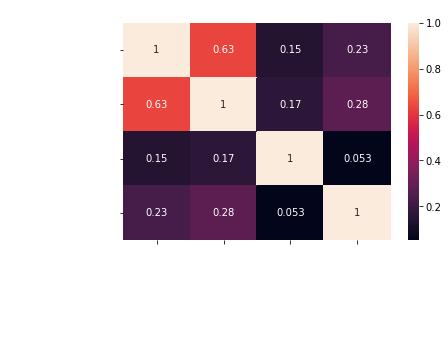

In [27]:
#Correlation matrix 
corrMatrix = train.corr()                              #creating correlation matrix
print (corrMatrix)                                     #printingcorrelation matrix
sns.heatmap(corrMatrix, annot=True,color="red")        #plotting heatmap of correlation matrix
plt.title("Correlation Analysis",color="white")        #adding title
plt.xticks(rotation=45,color="white")                  #rotating label tick and adding color
plt.yticks(color="white")                              #rotating label tick and adding color
plt.show()                                             #plotting graph

> Very poor relation of "Is_Lead" with all the other integer dtype attribute
> Regression might be bad choice. I think it will help we go for random forest

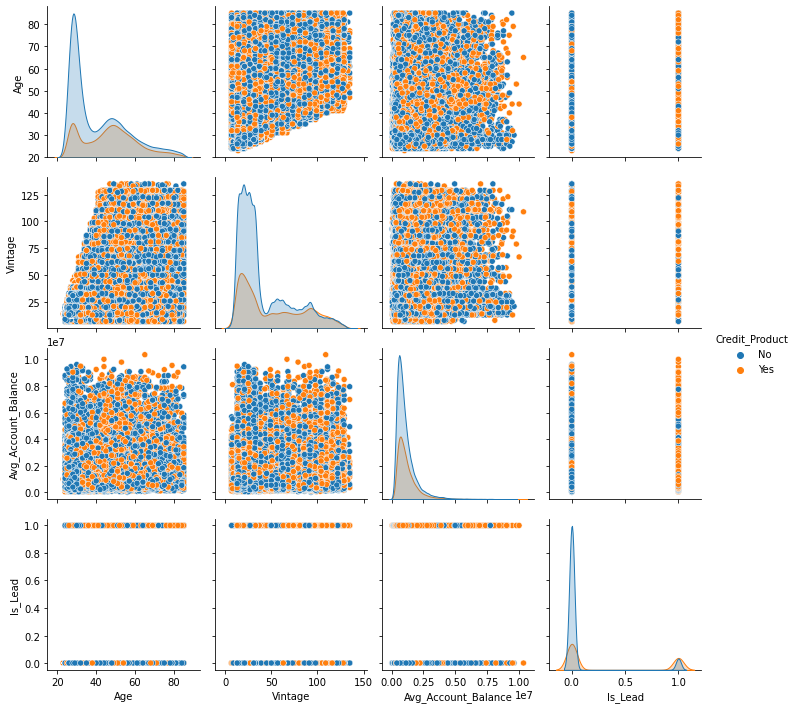

In [38]:
sns.pairplot(train,hue="Credit_Product")                         #to plot pair plot and analyse the data
plt.title("Pair Plot",color="white")        #adding title
plt.xticks(rotation=45,color="white")                  #rotating label tick and adding color
plt.yticks(color="white")                              #rotating label tick and adding color
plt.show()                                             #plotting graph

> There is no clear pattern can be recognised.
> But the people with age between(20-40) have less number of Credit Product

In [43]:
train = train.fillna(train['Credit_Product'].value_counts().index[0])    #filling missing value with on with higher number of yes or no 
test= test.fillna(test['Credit_Product'].value_counts().index[0])        #filling missing value with on with higher number of yes or no

In [44]:
train.isna().sum()                                  # check for missing values after modifying

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [47]:
test.isna().sum()                                  # check for missing values after modifying

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

## Encoding Categorical Data

In [48]:
lb_make = LabelEncoder()                      #label encoding of train data
for i in train.columns:                       #for each column
    if train[i].dtype == 'object':            #if column is object dtype
        train[i] = lb_make.fit_transform(train[i])  

train.head() 

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
IDD62UNG,0,30,27,2,0,32,0,581988,0,0
HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [50]:
lb_make = LabelEncoder()                    #label encoding of test data
for i in test.columns:                      #for each column
    if test[i].dtype == 'object':           #if column is object dtype
        test[i] = lb_make.fit_transform(test[i])

test.head() 

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,1,29,4,1,0,25,1,742366,0
CCMEWNKY,1,43,18,1,1,49,0,925537,0
VK3KGA9M,1,31,20,2,0,14,0,215949,0
TT8RPZVC,1,29,22,1,0,33,0,868070,0
SHQZEYTZ,0,29,20,1,0,19,0,657087,0


## Splitting Training Dataset

In [52]:
X = train.drop('Is_Lead', axis=1)                #feaature vairable is taken as x i.e Is_Lead is dropped
y = train['Is_Lead']                             #target variable is taken as y i.e Is_Lead
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)    #Splitting of Train data in 1:4

In [57]:
# feature scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# test = sc.transform(test)

### Machine Learning

In [58]:
from sklearn.linear_model import LogisticRegression          #logistics regression algorithm is imported
from sklearn.neighbors import KNeighborsClassifier           #KNN algorithm is imported
from sklearn import svm                                      #svm algorithm is imported
from sklearn.naive_bayes import GaussianNB                   #gaussianNB algorithm is imported
from sklearn.tree import DecisionTreeClassifier              #Decision tree algorithm is imported
from sklearn.ensemble import RandomForestClassifier          #Random Forest algorithm is imported
from xgboost import XGBClassifier                            #XGBClassifier algorithm is imported

from sklearn.metrics import roc_auc_score                    #roc_aoc_score calculator is imported
models = [LogisticRegression(solver="liblinear"), KNeighborsClassifier(),  GaussianNB(), DecisionTreeClassifier(),
          RandomForestClassifier(), XGBClassifier()]         #all algo is taken into a list
for model in models:                                         #each algorithm will run on train data
    model.fit(X_train, y_train)                              #train data is being fit into each model
    predictions = model.predict_proba(X_test)                #test data is predicited
    print(type(model).__name__)
    print("    AUC_SCORE", roc_auc_score(y_test, predictions[:,1])) #roc_auc_score is calcualed

LogisticRegression
    AUC_SCORE 0.4508705344224791
KNeighborsClassifier
    AUC_SCORE 0.5767460554672164
GaussianNB
    AUC_SCORE 0.6914509652021867
DecisionTreeClassifier
    AUC_SCORE 0.6119850676865499
RandomForestClassifier
    AUC_SCORE 0.7581797221023522


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
    AUC_SCORE 0.7864325388477913


![Roc_score](https://www.programmersought.com/images/427/7c024a0c23e696178e91d0acee0c6eeb.png)
_** The Algorithm which gives highest accuracy will be considered for further optimisation**_
> I will move forward with XGB Classifier since it gives better score

![XGboost](https://image.slidesharecdn.com/xgboost-171216133814/95/introduction-of-xgboost-18-638.jpg?cb=1513431811)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


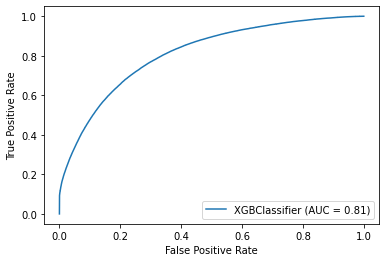

In [65]:
#xgboost algorithm is used
from xgboost import XGBClassifier                   #model is imported
xgb = XGBClassifier(eta=0.3)                               #classifier is renamed
xgb.fit(X,y)                                        #whole train data are fitted

from sklearn import metrics                         #metrics is imported
metrics.plot_roc_curve(xgb, X, y)                   #roc curve is plotted
plt.show() 

In [66]:
result = xgb.predict_proba(test)              #test data is predicted on generated model

In [68]:
result                                        #result is observed 

array([[0.96910435, 0.03089568],
       [0.7686897 , 0.23131031],
       [0.92467374, 0.07532629],
       ...,
       [0.44562334, 0.55437666],
       [0.54006565, 0.45993432],
       [0.93128026, 0.06871972]], dtype=float32)

> It is predicted probability of 0 and 1.// 
> We will consider second column for lead value is equal to true

In [69]:
df=pd.read_csv("test.csv")
ID = df["ID"]
res = pd.DataFrame(ID)
res.columns = ["ID"]     
#res["Is_Lead"] = result[0]
# res.to_csv("submission.csv",index=False)

In [70]:
abc= pd.DataFrame(result)
abc

,0,1
0,0.969104,0.030896
1,0.768690,0.231310
2,0.924674,0.075326
3,0.965250,0.034750
4,0.970836,0.029164
...,...,...
105307,0.016240,0.983760
105308,0.337205,0.662795
105309,0.445623,0.554377
105310,0.540066,0.459934


In [74]:
res["Is_Lead"] = abc[1]

## Saving Result

In [76]:
res.head()
res.to_csv("submission.csv",index=False)